In [1]:
import numpy as np
import requests

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = dict()

# every 0.5%
for mixture in [
    "Ar_80.0-C4H10_20.0",
    "Ar_80.5-C4H10_19.5",
    "Ar_81.0-C4H10_19.0",
    "Ar_81.5-C4H10_18.5",
    "Ar_82.0-C4H10_18.0",
    "Ar_82.5-C4H10_17.5",
    "Ar_83.0-C4H10_17.0",
    "Ar_83.5-C4H10_16.5",
    "Ar_84.0-C4H10_16.0",
    "Ar_84.5-C4H10_15.5",
    "Ar_85.0-C4H10_15.0",
    "Ar_85.5-C4H10_14.5",
    "Ar_86.0-C4H10_14.0",
    "Ar_86.5-C4H10_13.5",
    "Ar_87.0-C4H10_13.0",
    "Ar_87.5-C4H10_12.5",
    "Ar_88.0-C4H10_12.0",
    "Ar_88.5-C4H10_11.5",
    "Ar_89.0-C4H10_11.0",
    "Ar_89.5-C4H10_10.5",
    "Ar_90.0-C4H10_10.0",
    "Ar_90.5-C4H10_9.5",
    "Ar_91.0-C4H10_9.0",
    "Ar_91.5-C4H10_8.5",
    "Ar_92.0-C4H10_8.0",
    "Ar_92.5-C4H10_7.5",
    "Ar_93.0-C4H10_7.0",
    "Ar_93.5-C4H10_6.5",
    "Ar_94.0-C4H10_6.0",
    "Ar_94.5-C4H10_5.5",
    "Ar_95.0-C4H10_5.0",
    "Ar_95.5-C4H10_4.5",
    "Ar_96.0-C4H10_4.0",
    "Ar_96.5-C4H10_3.5",
    "Ar_97.0-C4H10_3.0",
    "Ar_97.5-C4H10_2.5",
    "Ar_98.0-C4H10_2.0",
    "Ar_98.5-C4H10_1.5",
    "Ar_99.0-C4H10_1.0",
    "Ar_99.5-C4H10_0.5",
]:
    url = f"https://lobis.github.io/gas-files/mixture/Ar-C4H10/{mixture}.gas.json"
    try:
        r = requests.get(url)
        data[mixture] = r.json()
    except Exception as e:
        print(f"Error: {e}")


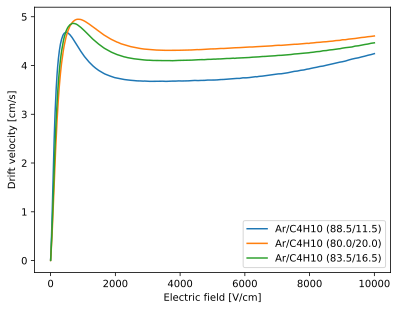

In [5]:
def mixture_string_to_label(mixture):
    words = mixture.replace("_", " ").replace("-", " ").split()
    # gases are the odd words
    gases = words[::2]
    # fractions are the even words
    fractions = words[1::2]
    assert len(gases) == len(fractions)
    return f"""{"/".join(gases)} ({"/".join(fractions)})"""


for mixture, gas in data.items():
    x = gas["electric_field"]
    y = gas["electron_drift_velocity"]
    plt.plot(x, y, label=mixture_string_to_label(mixture))

plt.xlabel("Electric field [V/cm]")
plt.ylabel("Drift velocity [cm/s]")
plt.legend()
plt.show()
